In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../csv/demographics.csv')

In [3]:
df.head()

,rank,age_code,gender_code,product_name,audience_percentage,product_package,total_active_users,active_users,sub_genre
0,1,<25,male,SHEIN-Fashion Shopping Online,0.045142,com.zzkko,19157963,864829,E-Commerce (Retailer)
1,1,>44,female,SHEIN-Fashion Shopping Online,0.117831,com.zzkko,19157963,2257395,E-Commerce (Retailer)
2,1,>44,male,SHEIN-Fashion Shopping Online,0.021036,com.zzkko,19157963,403005,E-Commerce (Retailer)
3,1,all,all,SHEIN-Fashion Shopping Online,1.000000,com.zzkko,19157963,19157963,E-Commerce (Retailer)
4,1,between 25 and 44,male,SHEIN-Fashion Shopping Online,0.102512,com.zzkko,19157963,1963926,E-Commerce (Retailer)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 2100 non-null   int64  
 1   age_code             2100 non-null   object 
 2   gender_code          2100 non-null   object 
 3   product_name         2100 non-null   object 
 4   audience_percentage  2100 non-null   float64
 5   product_package      2100 non-null   object 
 6   total_active_users   2100 non-null   int64  
 7   active_users         2100 non-null   int64  
 8   sub_genre            2100 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 147.8+ KB


In [5]:
df['audience_percentage'] = df['audience_percentage'].astype('float')

In [6]:
df['rank'] = df['rank'].astype('object')

In [7]:
#which gender is predominant
gender_df = df.query("age_code == 'all' and gender_code != 'all'")

In [9]:
gender_count = gender_df.groupby("gender_code")["active_users"].sum()
gender_count

gender_code
female    160083106
male      133683711
Name: active_users, dtype: int64

Text(0, 0.5, '')

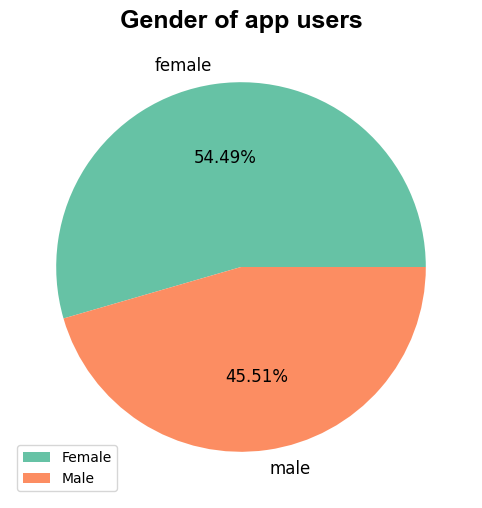

In [10]:

import seaborn as sns
plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')[0:5]
gender_count.plot.pie(autopct='%.2f%%',colors = colors,textprops={'fontsize': 12, 'color':'black'})
plt.title('Gender of app users', fontdict={'family': 'Arial', 'size': 18, 'weight': 'bold'})
plt.legend(labels=['Female','Male'],loc='lower left')
plt.ylabel("")

In [11]:
# 54.5$ of the mCommerce users are women

In [12]:
#Most frequent age group
age_df = df.query("age_code != 'all' and gender_code == 'all'")

In [13]:
age_df

,rank,age_code,gender_code,product_name,audience_percentage,product_package,total_active_users,active_users,sub_genre
7,1,<25,all,SHEIN-Fashion Shopping Online,0.222567,com.zzkko,19157963,4263933,E-Commerce (Retailer)
10,1,>44,all,SHEIN-Fashion Shopping Online,0.138866,com.zzkko,19157963,2660399,E-Commerce (Retailer)
11,1,between 25 and 44,all,SHEIN-Fashion Shopping Online,0.638566,com.zzkko,19157963,12233631,E-Commerce (Retailer)
18,2,>44,all,Shopee: Compre de Tudo Online,0.180000,com.shopee.br,44589200,8026056,E-Commerce (C2C)
20,2,between 25 and 44,all,Shopee: Compre de Tudo Online,0.700000,com.shopee.br,44589200,31212440,E-Commerce (C2C)
...,...,...,...,...,...,...,...,...,...
2085,341,>44,all,Shopping list — Lister,0.000001,com.DramaProductions.Einkaufen5,13254,0,Other Shopping
2086,341,between 25 and 44,all,Shopping list — Lister,0.169408,com.DramaProductions.Einkaufen5,13254,2245,Other Shopping
2093,344,between 25 and 44,all,Menores Preços Dudu Rocha,0.706784,com.influesolutions.influeassistant.dudurocha,3166,2238,E-Commerce (B2C)
2094,344,>44,all,Menores Preços Dudu Rocha,0.293168,com.influesolutions.influeassistant.dudurocha,3166,928,E-Commerce (B2C)


In [14]:
age_count = age_df.groupby("age_code")["active_users"].sum()

In [15]:
age_count

age_code
<25                   36718853
>44                   62906178
between 25 and 44    194196738
Name: active_users, dtype: int64

Text(0, 0.5, '')

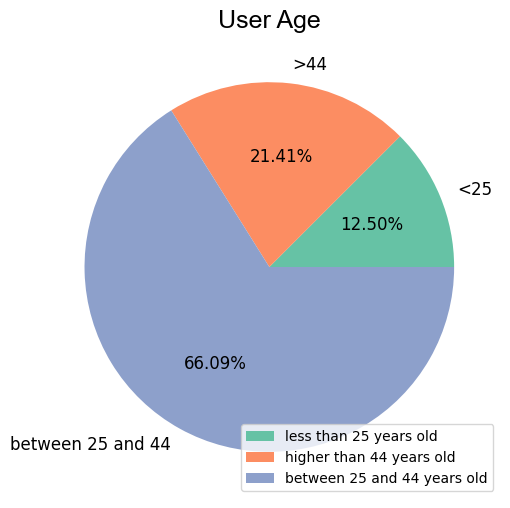

In [16]:
plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')[0:5]
age_count.plot.pie(autopct='%.2f%%',colors = colors,textprops={'fontsize': 12, 'color':'black'})
plt.title('User Age', fontdict={'family': 'Arial', 'size': 18})
plt.legend(labels=['less than 25 years old','higher than 44 years old','between 25 and 44 years old'],loc='lower right')
plt.ylabel("")

In [17]:
#Women's favorite apps
women_df = df.query("gender_code == 'female' and age_code =='all' and audience_percentage >= 0.51")

In [18]:
women_df.head(5)

,rank,age_code,gender_code,product_name,audience_percentage,product_package,total_active_users,active_users,sub_genre
6,1,all,female,SHEIN-Fashion Shopping Online,0.831310,com.zzkko,19157963,15926202,E-Commerce (Retailer)
15,2,all,female,Shopee: Compre de Tudo Online,0.570000,com.shopee.br,44589200,25415844,E-Commerce (C2C)
41,4,all,female,Magalu: loja e compras online,0.557237,com.luizalabs.mlapp,21192916,11809473,E-Commerce (B2C)
57,5,all,female,Americanas: compras online,0.583464,com.b2w.americanas,23795465,13883803,E-Commerce (B2C)
83,7,all,female,Casas Bahia: Compras Online,0.558918,com.novapontocom.casasbahia,10986033,6140296,E-Commerce (B2C)


In [19]:
women_df['sub_genre'].value_counts()

sub_genre
E-Commerce (Retailer)    53
E-Commerce (B2C)         24
Other Shopping           10
E-Commerce (C2C)          9
Coupons & Rewards         7
Resell                    2
Pharmacy & Drugstore      1
Name: count, dtype: int64

In [20]:
#Most preferred apps by mens
men_df = df.query("gender_code == 'male' and age_code =='all' and audience_percentage >= 0.51")

In [21]:
men_df.head(5)

,rank,age_code,gender_code,product_name,audience_percentage,product_package,total_active_users,active_users,sub_genre
33,3,all,male,Mercado Libre: Compras Online,0.572672,com.mercadolibre,41144943,23562552,E-Commerce (C2C)
63,6,all,male,Amazon Shopping,0.517641,com.amazon.mShop.android.shopping,19012526,9841667,E-Commerce (B2C)
92,8,all,male,AliExpress,0.563909,com.alibaba.aliexpresshd,20700695,11673307,E-Commerce (B2C)
101,9,all,male,OLX - Venda e Compra Online,0.660075,com.schibsted.bomnegocio.androidApp,18685367,12333753,Resell
153,13,all,male,Netshoes: Loja de Esportes,0.550000,br.com.netshoes.app,5495372,3022455,E-Commerce (Retailer)


In [22]:
men_df['sub_genre'].value_counts()

sub_genre
E-Commerce (Retailer)    25
E-Commerce (B2C)         14
Coupons & Rewards        11
E-Commerce (C2C)          7
Other Shopping            5
Resell                    1
Pharmacy & Drugstore      1
BNPL                      1
Name: count, dtype: int64

In [23]:
#Most preferred apps by young people
young_df = df.query("gender_code == 'all' and age_code =='<25' and audience_percentage >= 0.51")

In [24]:
young_df.head(5)

,rank,age_code,gender_code,product_name,audience_percentage,product_package,total_active_users,active_users,sub_genre
1271,150,<25,all,Gelt: Ganar dinero desde casa,0.604294,com.mdfactory.gelt,41720,25211,Coupons & Rewards
1702,238,<25,all,ROMWE - Ultimate Cyber Mall,0.783095,com.romwe,5074,3973,E-Commerce (Retailer)
1943,285,<25,all,Wanna Kicks : AR sneakers try,0.740166,by.wanna.apps.wsneakers,15383,11386,E-Commerce (Retailer)
2037,325,<25,all,Lista de Compras - List,0.833988,br.com.up.list,19675,16409,Other Shopping
2047,337,<25,all,That Shopping List,0.782335,de.markusliebschner.thatlist,17882,13990,Other Shopping


In [25]:
#Most preferred apps by older people
old_df = df.query("gender_code == 'all' and age_code =='>44' and audience_percentage >= 0.51")

In [26]:
old_df.head(5)

,rank,age_code,gender_code,product_name,audience_percentage,product_package,total_active_users,active_users,sub_genre
1551,205,>44,all,Lojas Marabraz,0.600921,com.app.marabraz,1337,803,E-Commerce (Retailer)
1604,211,>44,all,Magazine Médica,0.538960,br.com.twa.magazinemedica,12388,6677,E-Commerce (Retailer)
1782,255,>44,all,Nosso Caetano,0.706775,br.com.smcaetano.appcaetano,20711,14638,E-Commerce (Retailer)
2002,306,>44,all,Bershka: Fashion & trends,0.772999,com.inditex.ecommerce.bershka,3807,2943,E-Commerce (Retailer)
2059,338,>44,all,Shopping list voice input PRO,0.574287,com.tksolution.einkaufszettelmitspracheingabepro,3235,1858,Other Shopping


In [27]:
#Considering apps with more than 60% female audience, how does the age distribution change compared to the overall analysis?
women_age_df = df.query("gender_code == 'female' and age_code !='all'")

In [28]:
women_age_df

,rank,age_code,gender_code,product_name,audience_percentage,product_package,total_active_users,active_users,sub_genre
1,1,>44,female,SHEIN-Fashion Shopping Online,1.178306e-01,com.zzkko,19157963,2257395,E-Commerce (Retailer)
5,1,between 25 and 44,female,SHEIN-Fashion Shopping Online,5.360541e-01,com.zzkko,19157963,10269704,E-Commerce (Retailer)
9,1,<25,female,SHEIN-Fashion Shopping Online,1.774251e-01,com.zzkko,19157963,3399103,E-Commerce (Retailer)
12,2,>44,female,Shopee: Compre de Tudo Online,1.000000e-01,com.shopee.br,44589200,4458920,E-Commerce (C2C)
13,2,<25,female,Shopee: Compre de Tudo Online,7.000000e-02,com.shopee.br,44589200,3121244,E-Commerce (C2C)
...,...,...,...,...,...,...,...,...,...
2078,341,between 25 and 44,female,Shopping list — Lister,1.686198e-01,com.DramaProductions.Einkaufen5,13254,2235,Other Shopping
2082,341,<25,female,Shopping list — Lister,8.230389e-01,com.DramaProductions.Einkaufen5,13254,10909,Other Shopping
2095,344,between 25 and 44,female,Menores Preços Dudu Rocha,6.076479e-03,com.influesolutions.influeassistant.dudurocha,3166,19,E-Commerce (B2C)
2097,344,>44,female,Menores Preços Dudu Rocha,2.870989e-03,com.influesolutions.influeassistant.dudurocha,3166,9,E-Commerce (B2C)


In [29]:
women_age_count = women_age_df.groupby("age_code")["active_users"].sum()

In [30]:
women_age_count

age_code
<25                   18074583
>44                   32619499
between 25 and 44    109834918
Name: active_users, dtype: int64

Text(0, 0.5, '')

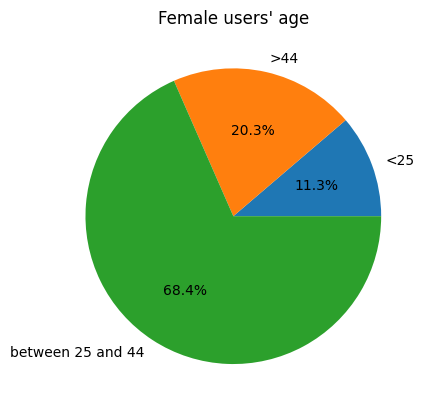

In [31]:
women_age_count.plot.pie(autopct='%.1f%%',)
plt.title("Female users' age")
plt.ylabel("") # remove o eixo y

In [32]:
men_age_df = df.query("gender_code == 'male' and age_code !='all'")

In [33]:
men_age_count = men_age_df.groupby("age_code")["active_users"].sum()

In [34]:
men_age_count

age_code
<25                  18644266
>44                  30231732
between 25 and 44    84807701
Name: active_users, dtype: int64

Text(0, 0.5, '')

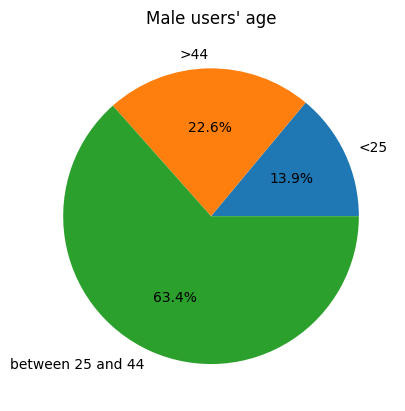

In [35]:
men_age_count.plot.pie(autopct='%.1f%%',)
plt.title("Male users' age")
plt.ylabel("") # remove o eixo y

In [36]:
women_df.to_csv('women.csv')

In [37]:
men_df.to_csv('men.csv')

# Correlation between subgenre, gender, and age code

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 2100 non-null   object 
 1   age_code             2100 non-null   object 
 2   gender_code          2100 non-null   object 
 3   product_name         2100 non-null   object 
 4   audience_percentage  2100 non-null   float64
 5   product_package      2100 non-null   object 
 6   total_active_users   2100 non-null   int64  
 7   active_users         2100 non-null   int64  
 8   sub_genre            2100 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 147.8+ KB


In [40]:
# Encoding categorical columns as numerical values
df['sub_genre'] = df['sub_genre'].astype('category').cat.codes
df['gender_code'] = df['gender_code'].astype('category').cat.codes
df['age_code'] = df['age_code'].astype('category').cat.codes


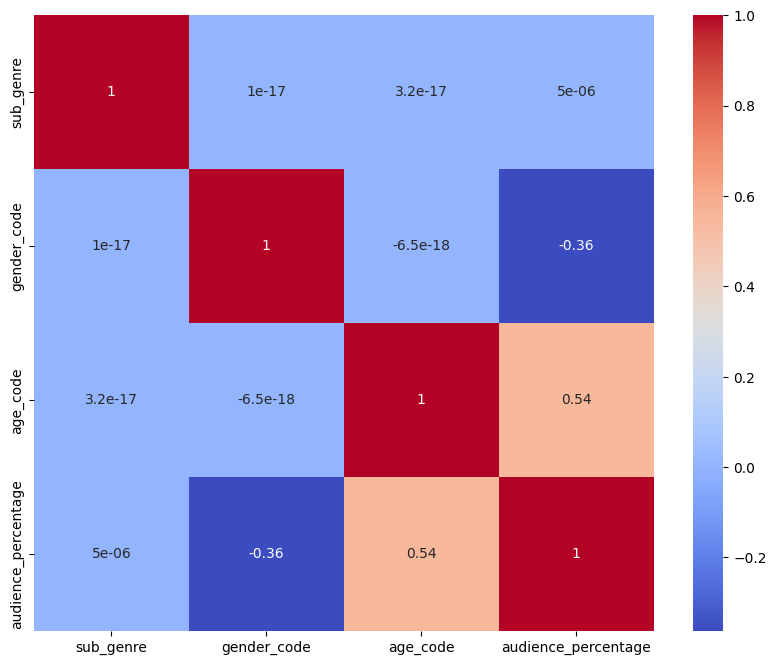

In [41]:
# Compute the correlation matrix between features
corr_matrix = df[['sub_genre', 'gender_code', 'age_code', 'audience_percentage']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


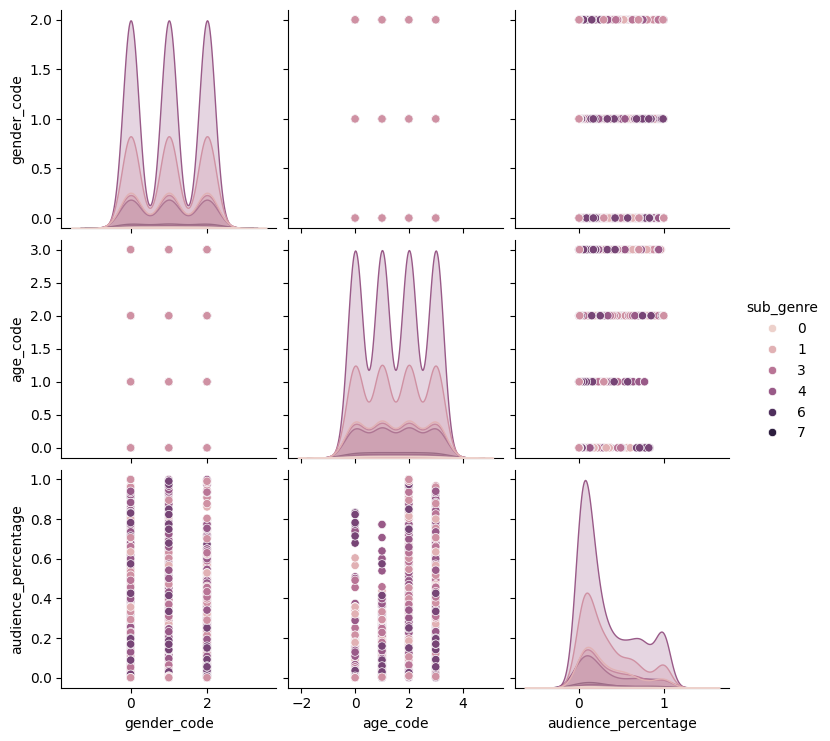

In [42]:
# Generating scatter plots to visualize relationships between variables
sns.pairplot(df, hue='sub_genre', vars=['gender_code', 'age_code', 'audience_percentage'])
plt.show()